## Observations and Insights 

- If you look at the Bar chart 1 and 2 ou can see that the drug Capomulin has the most number of mice through out the whole study. It is important to outline that the drug Ramicane has close to the same number of mice, if you look over the whole data set you can see that mostly all drug treatments part from proprive share all most equal size sets of mice. 

- Looking at the correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

- Theres one percent more male mice than female mice as showen in pie charts 1 and 2. 

- At close look at the line chart shows that a single mice ID x401 showd significant drop in tumor size during the timepoint of 5-10 with increase in size between timepoints of 10 to 14 and 20 to 25. Its important to state after those increase the tumor sizes drop significanly around timepoint 25 to 40. 

- The box plot shows tumor volumes of all drugs and based on the chart both drugs Capomulin and Ramicane help in the reduction of tumors compared to other treatments. 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how='outer',on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice= combined_df["Mouse ID"].nunique()
total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mic_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()

duplicate_mic_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mic_df = combined_df.loc[combined_df["Mouse ID"]== "g989", :]
duplicate_mic_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mic_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_total = clean_df['Mouse ID'].nunique()
clean_mice_total

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
Median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
Var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
Std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
Sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Sta_df = pd.DataFrame({"Mean Tumor Volume": Mean, "Median Tumor Volume": Median, "Tumor Variance": Var, "Tumor Volume Std. Dev.": Std, "Tumor Volume Std. err.": Sem})
Summary_Sta_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Volume Std. Dev.,Tumor Volume Std. err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

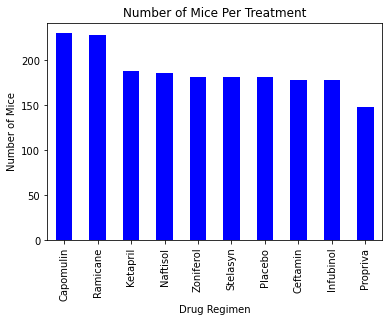

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Have to create a group serices by Drug Regimen to count the the data point for each drug. 
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

bar_plot_pd = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")
plt.savefig('Bar chart 1')


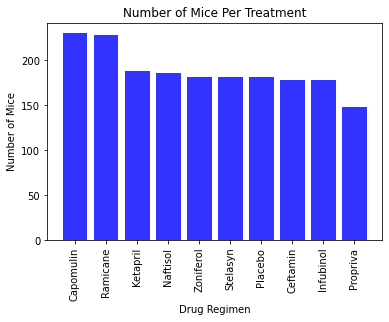

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis,y_axis,color='b',alpha=0.8,align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")
plt.xticks(rotation="vertical")

plt.show()
plt.savefig('Bar chart 2')


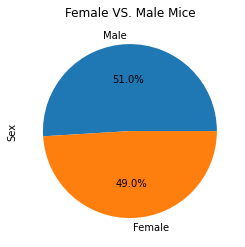

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
F_vs_M = clean_df["Sex"].value_counts()

plt.title("Female VS. Male Mice")
F_vs_M.plot.pie(autopct= "%1.1f%%")
plt.show()
plt.savefig('Pie chart 1')

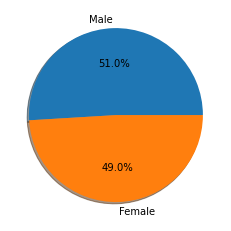

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(F_vs_M, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()
plt.savefig('Pie chart 2')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == "Ceftamin"]

# Combine the above dataframes 
drugs_frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
Basket_drugs = pd.concat(drugs_frames)

# Start by getting the last (greatest) timepoint for each mouse
group_by_ID = clean_df.groupby(["Mouse ID"])
greatest_TP = group_by_ID["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_frames = pd.merge(Basket_drugs, greatest_TP, on="Mouse ID")
Merged_frames["MaxTime"] = Merged_frames["Timepoint_x"] == Merged_frames["Timepoint_y"]

#drop all rows that do not include the max time
Merged_frames.drop(Merged_frames.loc[Merged_frames['MaxTime']==False].index, inplace=True)

#create new df with Mouse ID, Drug Regimen, Time and Tumor Volume
time_tumor_df = Merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments: 
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
    tumor_vol_data.append(volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower

    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drugs} are {outliers}.")
        

The outliers for Infubinol are 506    36.321346
Name: Tumor Volume (mm3), dtype: float64.


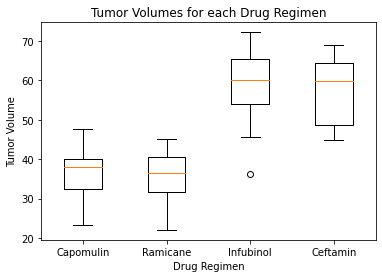

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()
plt.savefig('Box Plot chart')


## Line and Scatter Plots

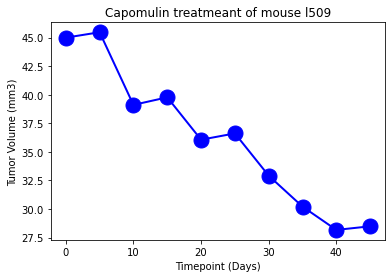

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "x401",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Line Chart')

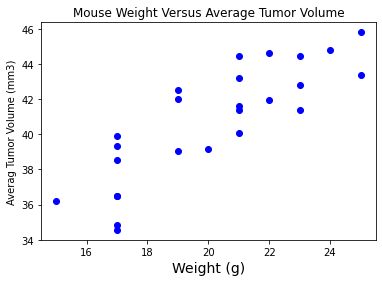

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.savefig('Scatter chart')

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


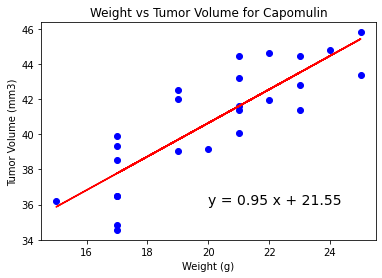

<Figure size 432x288 with 0 Axes>

In [36]:
#Added the linear regression equation and line to the plot. Also cal the correlation coefficient and linear regression model for mouse weight and average tumor voloume for the drug Capomulin regimen. 
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
plt.savefig('Scatter_LIN chart')